In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import requests

In [10]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
data=requests.get(url)
with open('letter-recognition.data','wb') as file:
    file.write(data.content)

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [26]:
columns=['letter']+[f'f{i}' for i in range(1,17)]

In [27]:
# Load data and split into features and labels
data = pd.read_csv("letter-recognition.data", header=None,names=columns)
X = data[columns[1:]]  # Features (columns 1 to end)
y = data['letter']   # Labels (first column)


In [28]:
# Encode labels to 0–25
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [44]:
y_encoded

array([19,  8,  3, ..., 19, 18,  0])

In [35]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(16,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes
])


In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,296 (130.07 KB)

 Trainable params: 11,098 (43.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,198 (86.71 KB)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3397 - loss: 2.4349 - val_accuracy: 0.6817 - val_loss: 1.0857
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7301 - loss: 0.9305 - val_accuracy: 0.7795 - val_loss: 0.7557
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7873 - loss: 0.7102 - val_accuracy: 0.8250 - val_loss: 0.5932
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.5566 - val_accuracy: 0.8400 - val_loss: 0.5230
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8567 - loss: 0.4698 - val_accuracy: 0.8615 - val_loss: 0.4500
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.4048 - val_accuracy: 0.8572 - val_loss: 0.4523
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3643 - val_accuracy: 0.8850 - val_loss: 0.3664
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8974 - loss: 0.3216 - val_accuracy: 0.

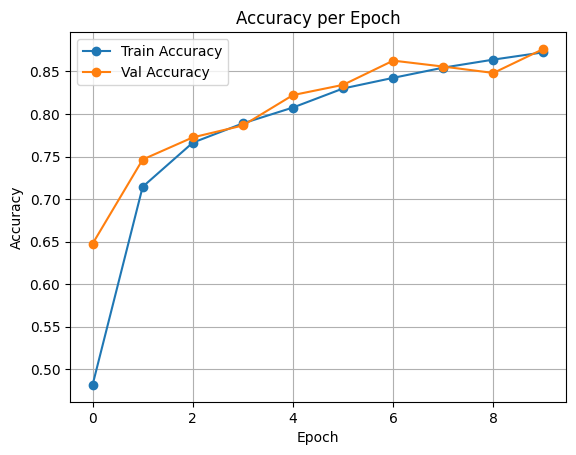

In [17]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Pick a sample from the validation set
sample = X_val.values[0].reshape(1, -1)  # Reshape to match model input shape

# Predict
prediction = model.predict(sample)
predicted_class_index = np.argmax(prediction)
predicted_letter = label_encoder.inverse_transform([predicted_class_index])

# Show result
print("Predicted Letter:", predicted_letter[0])
print("Actual Letter:", label_encoder.inverse_transform([y_val[0]])[0])
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Letter: V
Actual Letter: V
